<a href="https://colab.research.google.com/github/TheKompot/SisterCities/blob/main/Graph_and_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pickle
import pandas as pd

In [29]:
data  = {}
with open('sister_cities.pkl','rb') as f:
    data = pickle.load(f)
df = pd.DataFrame(data).T
df.head()

,sister_city,country_of_sc,country,continent,continent_of_sc
Asadabad,[Union City],[United States],Afghanistan,Asia,[North America]
Ghazni,"[Hayward, Nishapur]","[United States, Iran]",Afghanistan,Asia,"[North America, Asia]"
Herat,"[Council Bluffs, Nishapur]","[United States, Iran]",Afghanistan,Asia,"[North America, Asia]"
Jalalabad,[San Diego],[United States],Afghanistan,Asia,[North America]
Kabul,"[Ankara, Kazan]","[Turkey, Russia]",Afghanistan,Asia,"[Europe, Europe]"


In [42]:
#creating list of towns and corresponding continents
town=[]
continent= df.continent.tolist()
for t in df.index:
  if t!='':
    town.append(t)

sis_name=df.sister_city.values.tolist()
sis_cont=df.continent_of_sc.values.tolist()

for lis in range(len(sis_name)):
  for j in range (len(sis_name[lis])):
    if sis_name[lis][j] not in town:
      if sis_name[lis][j]!='':
        town.append(sis_name[lis][j])
        continent.append(sis_cont[lis][j])


In [45]:
# pocty miest v kontinentoch
c=list(continent)
print(c.count('Africa'), c.count('Asia'), c.count('Europe'), c.count('Oceania'), c.count('South America'), c.count('North America'))

433 1700 8752 213 362 1805


In [46]:
#creating corresponding colors by updating continent list
import numpy as np
np.unique(continent) 

color_map = {
    'Africa': "black",
     'Asia': "green",
    'Europe': "red",
    'North America': "yellow",
    'Oceania': "blue",
    'South America': 'white'
}


for i in range(len(continent)):
    if continent[i] in color_map:
        continent[i] = color_map[continent[i]]



In [47]:
#creating the graph
import networkx as nx
G = nx.Graph()

for h in range(len(town)):
  G.add_node(town[h], color=continent[h])

for row in df.index[0:len(town)]:
  if row!='':
    for sis in df.loc[row, 'sister_city']:
      if sis!='':  
        G.add_edge(row, sis, weight=1)
    


In [ ]:
#Vizualizacia
#!pip install pyvis

from pyvis.network import Network
net=Network(notebook=True)
net.from_nx(G)
net.save_graph("graph.html")

# New section

In [48]:
lis=[]
for c in nx.connected_components(G):
    lis.append(len(c))


#pomer najvacsie k celk. poctu miest
max(lis)/sum(lis)

0.7331323030531474

In [49]:
# celkovy pocet miest
len(G.nodes())


13265

In [50]:
#Priemerny stupen vrchola

pr_s= 2*(G.number_of_edges())/(G.number_of_nodes())
print(pr_s)

#Hustota

hus=pr_s/(G.number_of_nodes()-1)
print(hus)



2.7835657745947984
0.00020985869832590458


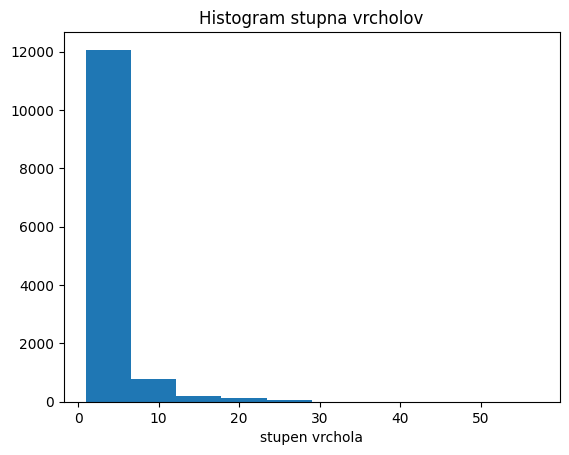

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
import matplotlib.pyplot as plt
#rozdelenie stupna vrcholov

degrees = [G.degree(n) for n in G.nodes()]
plt.title('Histogram stupna vrcholov')
plt.xlabel('stupen vrchola')
plt.hist(degrees)
plt.savefig('hist.png')

plt.show()

from google.colab import files
files.download("hist.png")




In [ ]:
#mesto s najvacsim poctov sister cities
list(G.nodes())[degrees.index(max(degrees))]

#pocet vrcholov RIo de Janeiro
len(df.loc['Rio de Janeiro', 'sister_city'])

'Rio de Janeiro'

In [ ]:
with open('degree.txt', 'w') as f:
    for line in degrees:
        f.write(f"{line}\n")


from google.colab import files
files.download("degrees.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import networkx as nx
page=nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
pagelist = list(page.items())

with open('pagerank.txt', 'w') as f:
    for line in pagelist:
        f.write(f"{line}\n")


from google.colab import files
files.download("pagerank.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:


komp_suv=[]
for c in nx.connected_components(G):
    komp_suv.append(c)


n_komp_suv=len(komp_suv)
#pocet komponentov suvislosti
print(n_komp_suv)


Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
print(len(Gcc[0]))
  

1400
9725


In [ ]:
    
#average shortest path

nx.average_shortest_path_length(G.subgraph(Gcc[0]))

7.320858935409064